In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import lightgbm as lgb
import matplotlib.pyplot as plt
import scipy as sc
from sklearn import tree
import graphviz
import eli5
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,roc_curve,auc
from sklearn.model_selection import StratifiedKFold,KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE,RandomOverSampler
from imblearn.under_sampling import ClusterCentroids,NearMiss,RandomUnderSampler
from eli5.sklearn import PermutationImportance
from scipy.stats import randint as sp_randint
from pdpbox import pdp, get_dataset,info_plots
from lightgbm import LGBMRegressor
import xgboost as xgb

%matplotlib inline

Using TensorFlow backend.


In [2]:
#set working directory
os.chdir("C:/Users/headway/Desktop\m/Projects/edwisor")

In [3]:
os.getcwd()

'C:\\Users\\headway\\Desktop\\m\\Projects\\edwisor'

In [4]:
#loading data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [5]:
train.head(10)

ID_code  target    var_0   var_1    var_2   var_3    var_4    var_5  \
0  train_0       0   8.9255 -6.7863  11.9081  5.0930  11.4607  -9.2834   
1  train_1       0  11.5006 -4.1473  13.8588  5.3890  12.3622   7.0433   
2  train_2       0   8.6093 -2.7457  12.0805  7.8928  10.5825  -9.0837   
3  train_3       0  11.0604 -2.1518   8.9522  7.1957  12.5846  -1.8361   
4  train_4       0   9.8369 -1.4834  12.8746  6.6375  12.2772   2.4486   
5  train_5       0  11.4763 -2.3182  12.6080  8.6264  10.9621   3.5609   
6  train_6       0  11.8091 -0.0832   9.3494  4.2916  11.1355  -8.0198   
7  train_7       0  13.5580 -7.9881  13.8776  7.5985   8.6543   0.8310   
8  train_8       0  16.1071  2.4426  13.9307  5.6327   8.8014   6.1630   
9  train_9       0  12.5088  1.9743   8.8960  5.4508  13.6043 -16.2859   

    var_6    var_7  ...  var_190  var_191  var_192  var_193  var_194  var_195  \
0  5.1187  18.6266  ...   4.4354   3.9642   3.1364   1.6910  18.5227  -2.3978   
1  5.6208  16.5338  ...   7.6421   7.7214   2.5837  10.9516  15.4305   2.0339   
2  6.9427  14.6155  ...   2.9057   9.7905   1.6704   1.6858  21.6042   3.1417   
3  5.8428  14.9250  ...   4.4666   4.7433   0.7178   1.4214  23.0347  -1.2706   
4  5.9405  19.2514  ...  -1.4905   9.5214  -0.1508   9.1942  13.2876  -1.5121   
5  4.5322  15.2255  ...  -6.3068   6.6025   5.2912   0.4403  14.9452   1.0314   
6  6.1961  12.0771  ...   8.7830   6.4521   3.5325   0.1777  18.3314   0.5845   
7  5.6890  22.3262  ...  13.1700   6.5491   3.9906   5.8061  23.1407  -0.3776   
8  4.4514  10.1854  ...   1.4298  14.7510   1.6395   1.4181  14.8370  -1.9940   
9  6.0637  16.8410  ...   0.5543   6.3160   1.0371   3.6885  14.8344   0.4467   

   var_196  var_197  var_198  var_199  
0   7.8784   8.5635  12.7803  -1.0914  
1   8.1267   8.7889  18.3560   1.9518  
2  -6.5213   8.2675  14.7222   0.3965  
3  -2.9275  10.2922  17.9697  -8.9996  
4   3.9267   9.5031  17.9974  -8.8104  
5  -3.6241   9.7670  12.5809  -4.7602  
6   9.1104   9.1143  10.8869  -3.2097  
7   4.2178   9.4237   8.6624   3.4806  
8  -1.0733   8.1975  19.5114   4.8453  
9  14.1287   7.9133  16.2375  14.2514  

[10 rows x 202 columns]

In [6]:
test.head(10)

ID_code    var_0    var_1    var_2   var_3    var_4    var_5   var_6  \
0  test_0  11.0656   7.7798  12.9536  9.4292  11.4327  -2.3805  5.8493   
1  test_1   8.5304   1.2543  11.3047  5.1858   9.1974  -4.0117  6.0196   
2  test_2   5.4827 -10.3581  10.1407  7.0479  10.2628   9.8052  4.8950   
3  test_3   8.5374  -1.3222  12.0220  6.5749   8.8458   3.1744  4.9397   
4  test_4  11.7058  -0.1327  14.1295  7.7506   9.1035  -8.5848  6.8595   
5  test_5   5.9862  -2.2913   8.6058  7.0685  14.2465  -8.6761  4.2467   
6  test_6   8.4624  -6.1065   7.3603  8.2627  12.0104  -7.2073  4.1670   
7  test_7  17.3035  -2.4212  13.3989  8.3998  11.0777   9.6449  5.9596   
8  test_8   6.9856   0.8402  13.7161  4.7749   8.6784 -13.7607  4.3386   
9  test_9  10.3811  -6.9348  14.6690  9.0941  11.9058 -10.8018  3.4508   

     var_7   var_8  ...  var_190  var_191  var_192  var_193  var_194  var_195  \
0  18.2675  2.1337  ...  -2.1556  11.8495  -1.4300   2.4508  13.7112   2.4669   
1  18.6316 -4.4131  ...  10.6165   8.8349   0.9403  10.1282  15.5765   0.4773   
2  20.2537  1.5233  ...  -0.7484  10.9935   1.9803   2.1800  12.9813   2.1281   
3  20.5660  3.3755  ...   9.5702   9.0766   1.6580   3.5813  15.1874   3.1656   
4  10.6048  2.9890  ...   4.2259   9.1723   1.2835   3.3778  19.5542  -0.2860   
5  14.7632  1.8790  ...  -2.1115   7.1178  -0.4249   8.8781  14.9438  -2.2151   
6  13.0809 -4.3004  ...  12.3609   6.8661   4.0971   8.8484  17.5010   0.0295   
7  17.8477 -4.8068  ...   4.4676   4.4214   0.9303   1.4994  15.2648  -1.7931   
8  14.5843  2.5883  ...  -3.4657   7.8754   2.4698  -0.0362  16.7144   0.1221   
9  20.2816 -1.4112  ...   1.8052  11.0723   0.8907   4.7680  15.1425   0.6075   

   var_196  var_197  var_198  var_199  
0   4.3654  10.7200  15.4722  -8.7197  
1  -1.4852   9.8714  19.1293 -20.9760  
2  -7.1086   7.0618  19.8956 -23.1794  
3   3.9567   9.2295  13.0168  -4.2108  
4  -5.1612   7.2882  13.9260  -9.1846  
5  -6.0233   9.8117  17.1127  10.8240  
6   7.7443   9.1509  18.4736   5.1499  
7   6.5316  10.4855  23.4631   0.7283  
8  -1.4328   9.9207  16.9865  -3.3304  
9  -4.4447   9.5788  15.8146   9.3457  

[10 rows x 201 columns]

In [7]:
#shape of the datasets
train.shape, test.shape

((200000, 202), (200000, 201))

In [8]:
##summary of the train dataset
train.describe()

target          var_0          var_1          var_2  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        0.100490      10.679914      -1.627622      10.715192   
std         0.300653       3.040051       4.050044       2.640894   
min         0.000000       0.408400     -15.043400       2.117100   
25%         0.000000       8.453850      -4.740025       8.722475   
50%         0.000000      10.524750      -1.608050      10.580000   
75%         0.000000      12.758200       1.358625      12.516700   
max         1.000000      20.315000      10.376800      19.353000   

               var_3          var_4          var_5          var_6  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        6.796529      11.078333      -5.065317       5.408949   
std         2.043319       1.623150       7.863267       0.866607   
min        -0.040200       5.074800     -32.562600       2.347300   
25%         5.254075       9.883175     -11.200350       4.767700   
50%         6.825000      11.108250      -4.833150       5.385100   
75%         8.324100      12.261125       0.924800       6.003000   
max        13.188300      16.671400      17.251600       8.447700   

               var_7          var_8  ...        var_190        var_191  \
count  200000.000000  200000.000000  ...  200000.000000  200000.000000   
mean       16.545850       0.284162  ...       3.234440       7.438408   
std         3.418076       3.332634  ...       4.559922       3.023272   
min         5.349700     -10.505500  ...     -14.093300      -2.691700   
25%        13.943800      -2.317800  ...      -0.058825       5.157400   
50%        16.456800       0.393700  ...       3.203600       7.347750   
75%        19.102900       2.937900  ...       6.406200       9.512525   
max        27.691800      10.151300  ...      18.440900      16.716500   

             var_192        var_193        var_194        var_195  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        1.927839       3.331774      17.993784      -0.142088   
std         1.478423       3.992030       3.135162       1.429372   
min        -3.814500     -11.783400       8.694400      -5.261000   
25%         0.889775       0.584600      15.629800      -1.170700   
50%         1.901300       3.396350      17.957950      -0.172700   
75%         2.949500       6.205800      20.396525       0.829600   
max         8.402400      18.281800      27.928800       4.272900   

             var_196        var_197        var_198        var_199  
count  200000.000000  200000.000000  200000.000000  200000.000000  
mean        2.303335       8.908158      15.870720      -3.326537  
std         5.454369       0.921625       3.010945      10.438015  
min       -14.209600       5.960600       6.299300     -38.852800  
25%        -1.946925       8.252800      13.829700     -11.208475  
50%         2.408900       8.888200      15.934050      -2.819550  
75%         6.556725       9.593300      18.064725       4.836800  
max        18.321500      12.000400      26.079100      28.500700  

[8 rows x 201 columns]

In [9]:
##summary of the test dataset
test.describe()

var_0          var_1          var_2          var_3  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean       10.658737      -1.624244      10.707452       6.788214   
std         3.036716       4.040509       2.633888       2.052724   
min         0.188700     -15.043400       2.355200      -0.022400   
25%         8.442975      -4.700125       8.735600       5.230500   
50%        10.513800      -1.590500      10.560700       6.822350   
75%        12.739600       1.343400      12.495025       8.327600   
max        22.323400       9.385100      18.714100      13.142000   

               var_4          var_5          var_6          var_7  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean       11.076399      -5.050558       5.415164      16.529143   
std         1.616456       7.869293       0.864686       3.424482   
min         5.484400     -27.767000       2.216400       5.713700   
25%         9.891075     -11.201400       4.772600      13.933900   
50%        11.099750      -4.834100       5.391600      16.422700   
75%        12.253400       0.942575       6.005800      19.094550   
max        16.037100      17.253700       8.302500      28.292800   

               var_8          var_9  ...        var_190        var_191  \
count  200000.000000  200000.000000  ...  200000.000000  200000.000000   
mean        0.277135       7.569407  ...       3.189766       7.458269   
std         3.333375       1.231865  ...       4.551239       3.025189   
min        -9.956000       4.243300  ...     -14.093300      -2.407000   
25%        -2.303900       6.623800  ...      -0.095000       5.166500   
50%         0.372000       7.632000  ...       3.162400       7.379000   
75%         2.930025       8.584825  ...       6.336475       9.531100   
max         9.665500      11.003600  ...      20.359000      16.716500   

             var_192        var_193        var_194        var_195  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        1.925944       3.322016      17.996967      -0.133657   
std         1.479966       3.995599       3.140652       1.429678   
min        -3.340900     -11.413100       9.382800      -4.911900   
25%         0.882975       0.587600      15.634775      -1.160700   
50%         1.892600       3.428500      17.977600      -0.162000   
75%         2.956000       6.174200      20.391725       0.837900   
max         8.005000      17.632600      27.947800       4.545400   

             var_196        var_197        var_198        var_199  
count  200000.000000  200000.000000  200000.000000  200000.000000  
mean        2.290899       8.912428      15.869184      -3.246342  
std         5.446346       0.920904       3.008717      10.398589  
min       -13.944200       6.169600       6.584000     -39.457800  
25%        -1.948600       8.260075      13.847275     -11.124000  
50%         2.403600       8.892800      15.943400      -2.725950  
75%         6.519800       9.595900      18.045200       4.935400  
max        15.920700      12.275800      26.538400      27.907400  

[8 rows x 200 columns]

In [10]:
#Id column
train_id = train['ID_code']
test_id = test['ID_code']

In [11]:
#target column
target = train['target']

In [12]:
#counting observations per target class
train.target.value_counts()

0    179902
1     20098
Name: target, dtype: int64

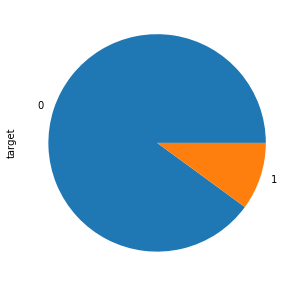

In [13]:
#plotting pie chart for target class
train['target'].value_counts().plot(kind='pie',figsize=(5,5))

In [14]:
#Target Class percentage count
target_class=train['target'].value_counts()/len(train)*100
print('Target Class percentage count:\n',target_class)

Target Class percentage count:
 0    89.951
1    10.049
Name: target, dtype: float64


In [15]:
####### We can obsereve that it is an typically imbalanced target variable #########
#### 0 - WHERE 90% PEOPLE DO NOT MAKE TRANSACTION ####
#### 1 - WHERE 10% PEOPLE MAKE TRANSACTION ####

In [16]:
##### Missing Value Analysis ######
#checking for missing values in train data
train.isna().sum().sum()

0

In [17]:
#checking for missing values in test data
test.isna().sum().sum()

0

In [18]:
############# No Missing Values in train and test data ############ 

In [19]:
numerical_features=train.columns[2:201]
numerical_features

Index(['var_0', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6', 'var_7',
       'var_8', 'var_9',
       ...
       'var_189', 'var_190', 'var_191', 'var_192', 'var_193', 'var_194',
       'var_195', 'var_196', 'var_197', 'var_198'],
      dtype='object', length=199)

In [20]:
numerical_test_features=test.columns[1:201]
numerical_test_features

Index(['var_0', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6', 'var_7',
       'var_8', 'var_9',
       ...
       'var_190', 'var_191', 'var_192', 'var_193', 'var_194', 'var_195',
       'var_196', 'var_197', 'var_198', 'var_199'],
      dtype='object', length=200)

Distribution of Columns


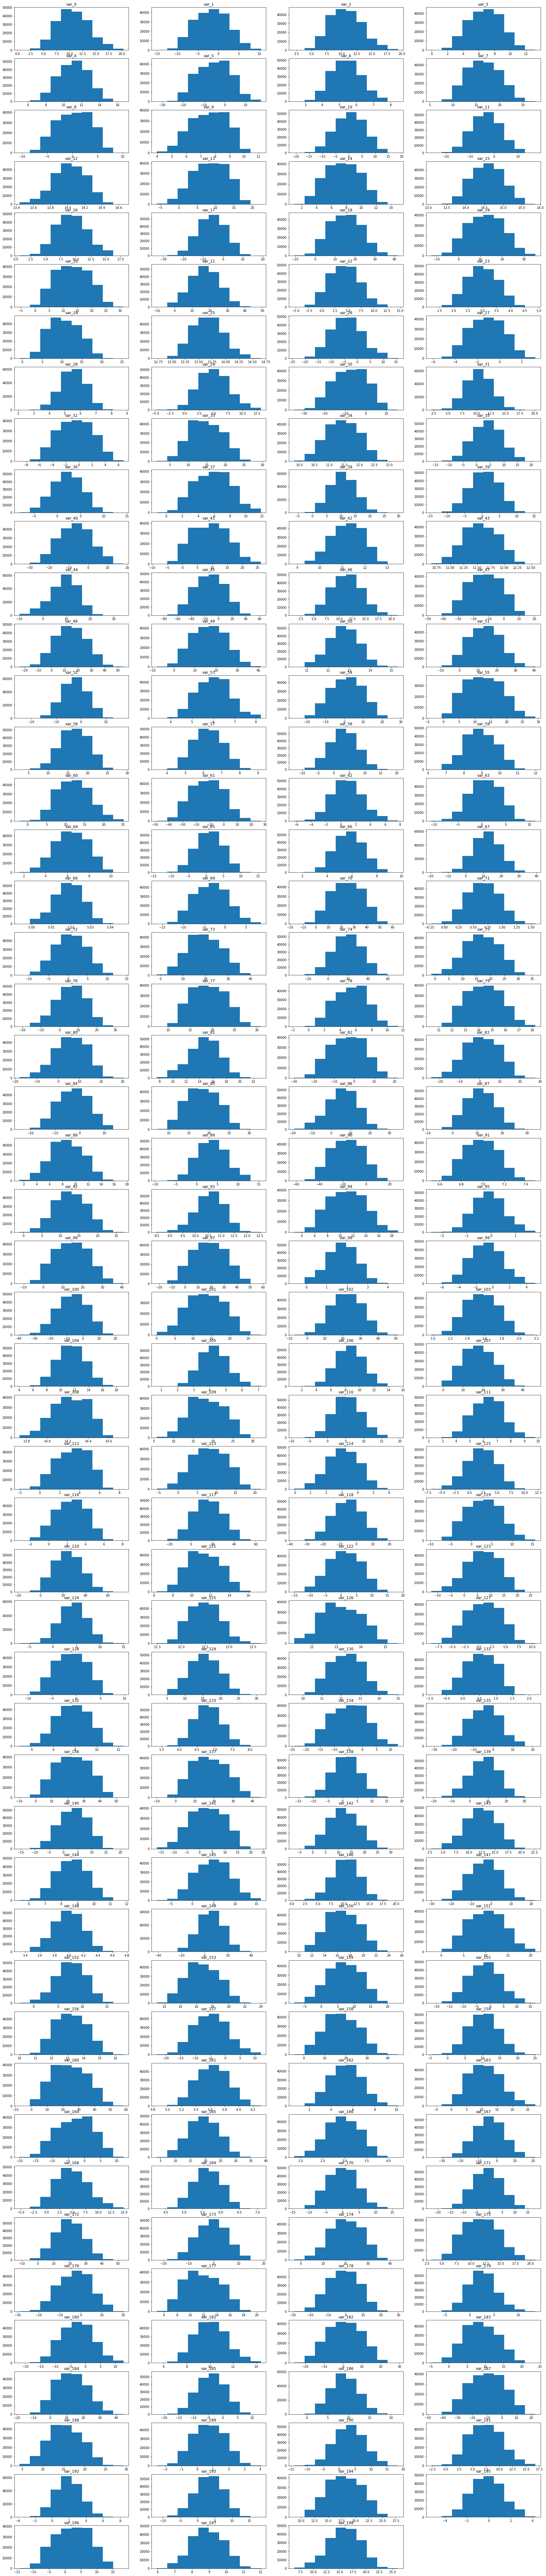

In [21]:
#drawing histograms of numeric data in training set 
print("Distribution of Columns")
plt.figure(figsize=(30,150))
for i,col in enumerate(numerical_features):
    plt.subplot(50,4,i+1)
    plt.hist(train[col])
    plt.title(col)

In [22]:
###### Here almost every features are following normal distribution ######

Distribution of columns per target class


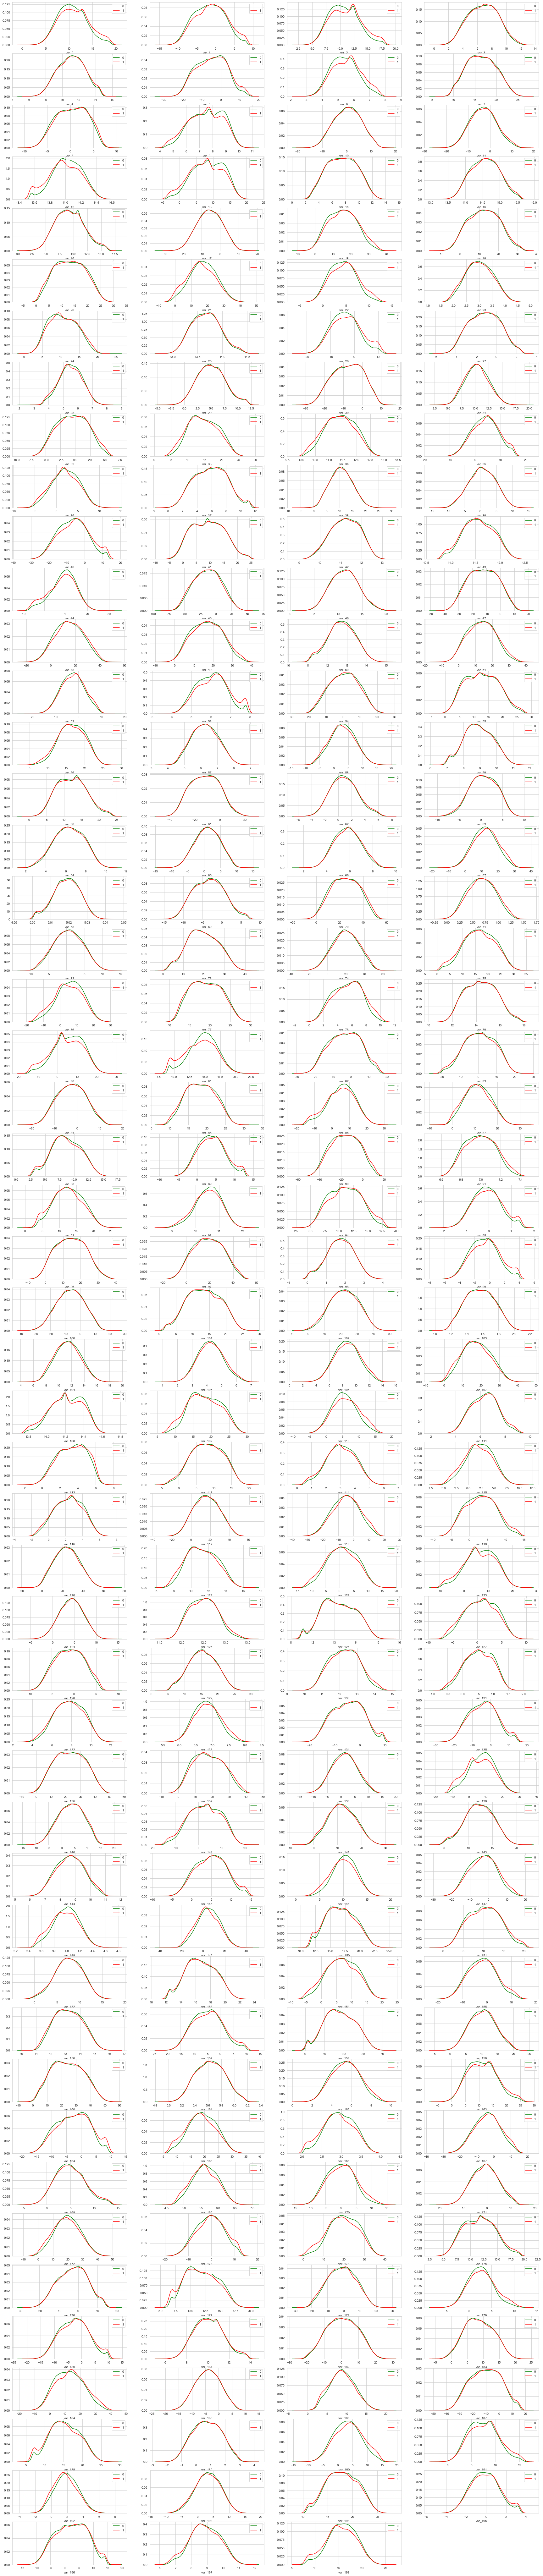

In [23]:
print("Distribution of columns per target class")
sns.set_style('whitegrid')
plt.figure(figsize=(30,150))
for i,col in enumerate(numerical_features):
    plt.subplot(50,4,i+1)
    sns.distplot(train[train['target']==0][col],hist=False,label='0',color='green')
    sns.distplot(train[train['target']==1][col],hist=False,label='1',color='red')

Distribution of columns for test and train datset


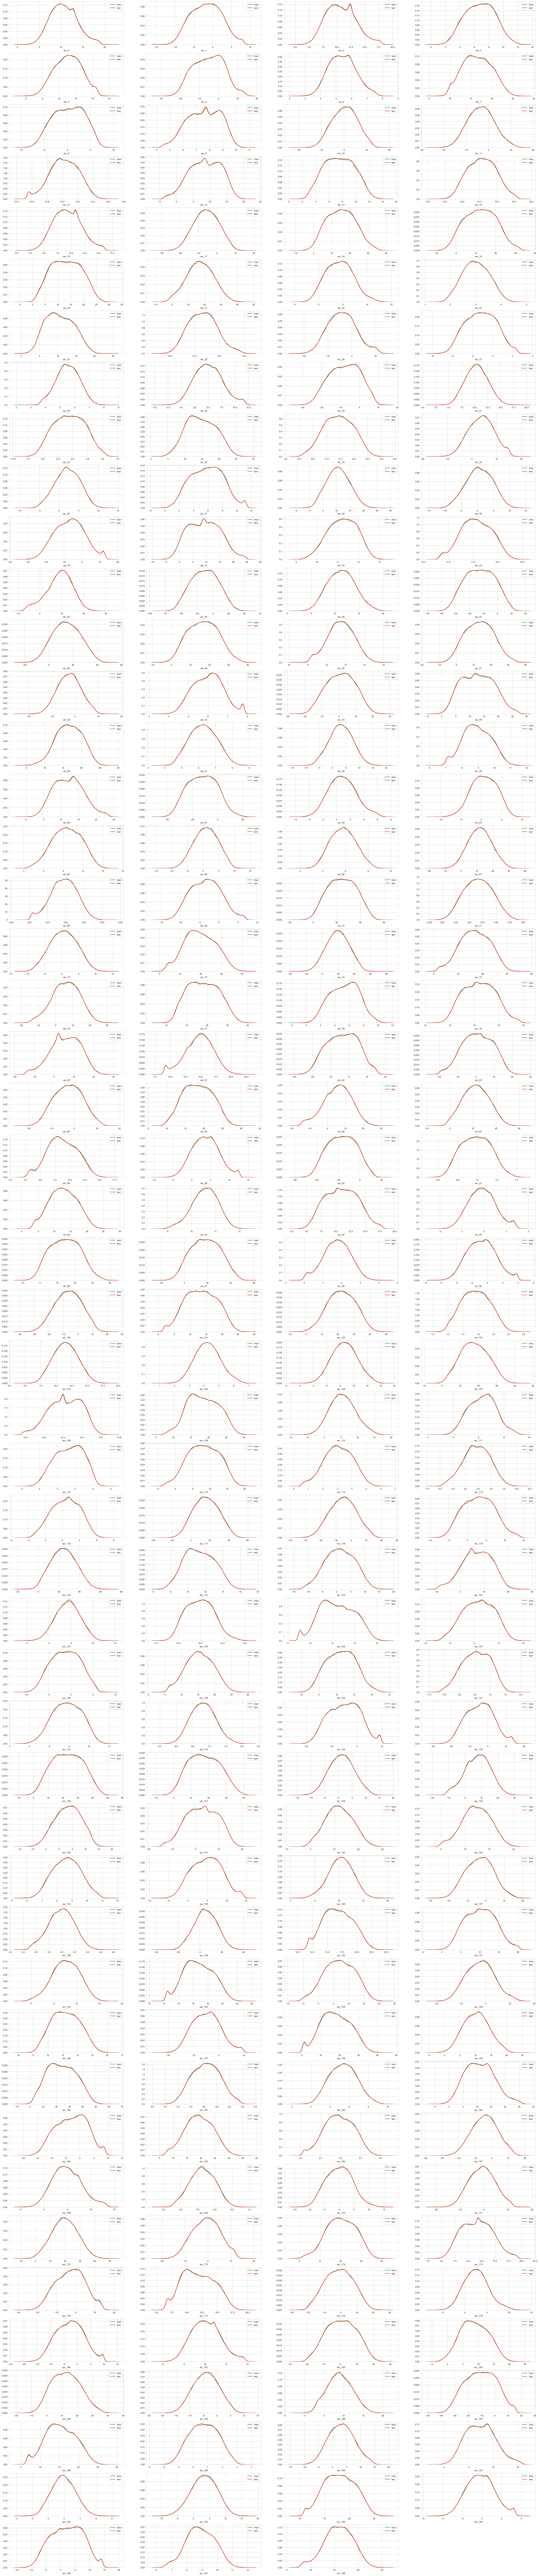

In [24]:
#Distribution of numeri variables in train and test data 
print("Distribution of columns for test and train datset")
sns.set_style('whitegrid')
plt.figure(figsize=(40,200))
for i,col in enumerate(numerical_features):
    plt.subplot(50,4,i+1)
    sns.distplot(train[col],hist=False,label='train',color='green')
    sns.distplot(test[col],hist=False,label='test',color='red')

In [25]:
###ATTRIBUTES OF BOTH TRAIN AND TEST DATA ###
train_attributes=train.columns.values[2:202]
test_attributes=test.columns.values[1:201]

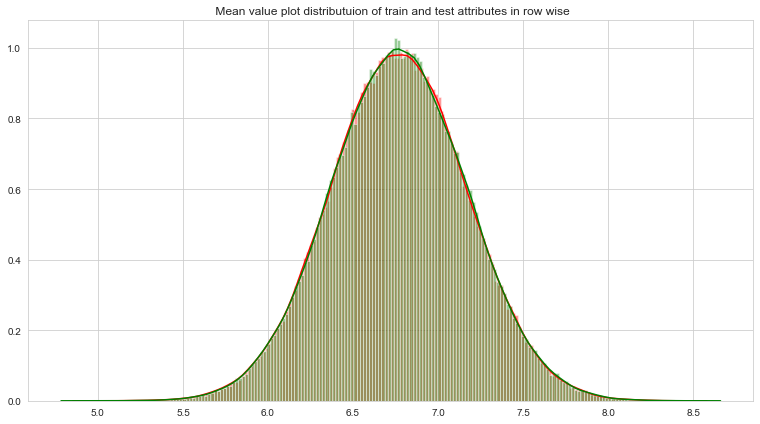

In [26]:
###### Mean value distribution of train and test attributes in dataset ########


#### Mean value plot distributuion of trainset at row wise ####
plt.figure(figsize=(13,7))
sns.distplot(train[train_attributes].mean(axis=1),color='red',kde=True,bins=200,label='train')
#### Mean value plot distributuion in testset at row wise ###
sns.distplot(test[test_attributes].mean(axis=1),color='green',kde=True, bins=200,label='test')
plt.title(' Mean value plot distributuion of train and test attributes in row wise')
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

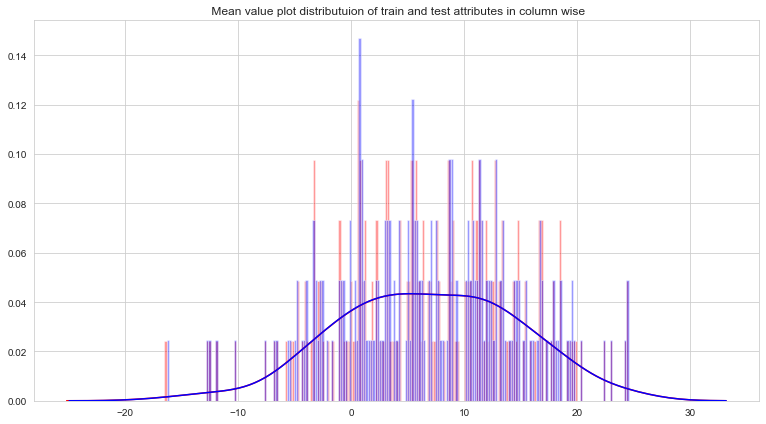

In [27]:
#### Mean value plot distributuion of trainset at column wise ####
plt.figure(figsize=(13,7))
sns.distplot(train[train_attributes].mean(axis=0),color='red',kde=True,bins=200,label='train')
#### Mean value plot distributuion in testset at column wise ####
sns.distplot(test[test_attributes].mean(axis=0),color='blue',kde=True,bins=200,label='test')
plt.title(' Mean value plot distributuion of train and test attributes in column wise')
plt.show

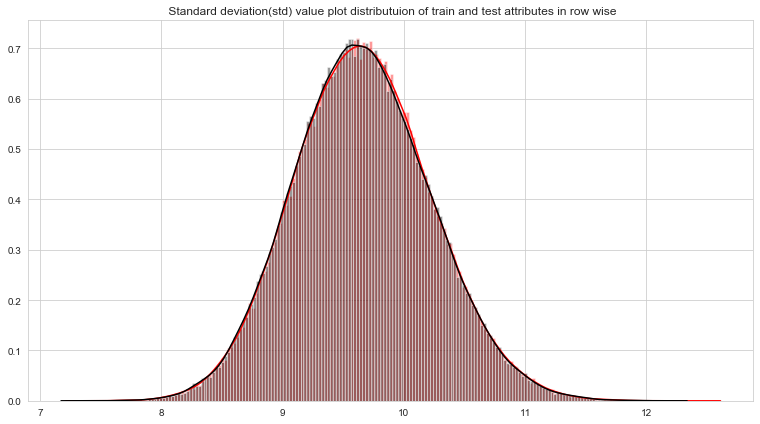

In [28]:
###### Standard Deviation (std) value distributuion of train and test attributes in dataset ########


#### (std) value plot distributuion of trainset at row wise ####
plt.figure(figsize=(13,7))
sns.distplot(train[train_attributes].std(axis=1),color='red',kde=True,bins=200,label='train')
#### (std) value plot distributuion in testset at row wise ####
sns.distplot(test[test_attributes].std(axis=1),color='black',kde=True, bins=200,label='test')
plt.title(' Standard deviation(std) value plot distributuion of train and test attributes in row wise')
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

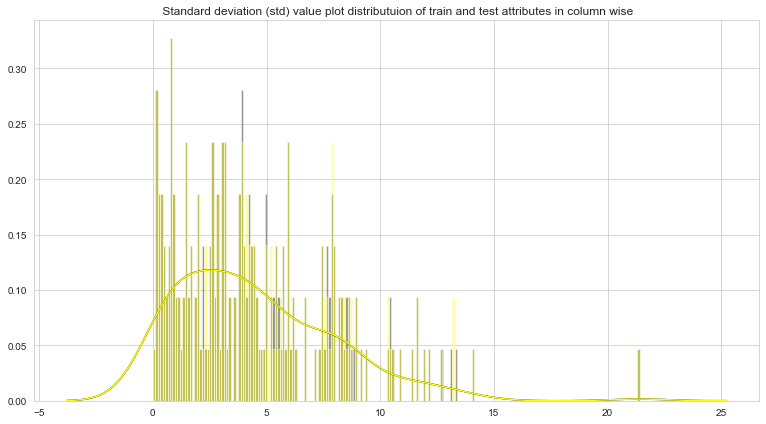

In [29]:
#### (std) value plot distributuion of trainset at column wise ####
plt.figure(figsize=(13,7))
sns.distplot(train[train_attributes].std(axis=0),color='black',kde=True,bins=200,label='train')
#### (std) value plot distributuion in testset at column wise ####
sns.distplot(test[test_attributes].std(axis=0),color='yellow',kde=True,bins=200,label='test')
plt.title(' Standard deviation (std) value plot distributuion of train and test attributes in column wise')
plt.show

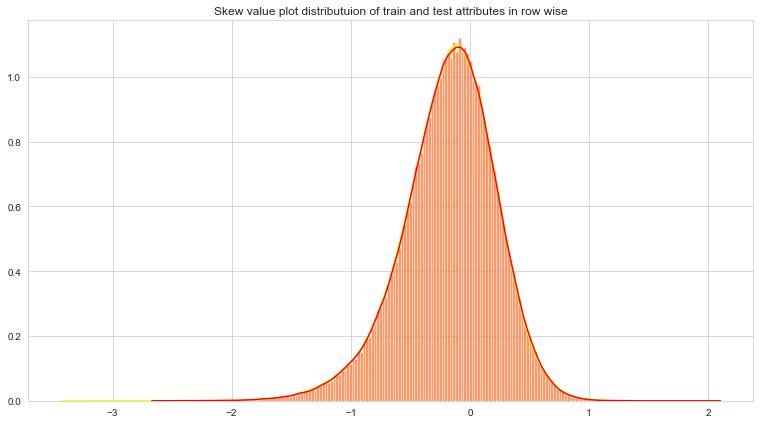

In [30]:
###### Skewness value plot distributuion of train and test attributes in dataset ########


#### Skew value plot distributuion of trainset at row wise ####
plt.figure(figsize=(13,7))
sns.distplot(train[train_attributes].skew(axis=1),color='yellow',kde=True,bins=200,label='train')
#### Skew value plot distributuion in testset at row wise ####
sns.distplot(test[test_attributes].skew(axis=1),color='red',kde=True, bins=200,label='test')
plt.title('Skew value plot distributuion of train and test attributes in row wise')
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

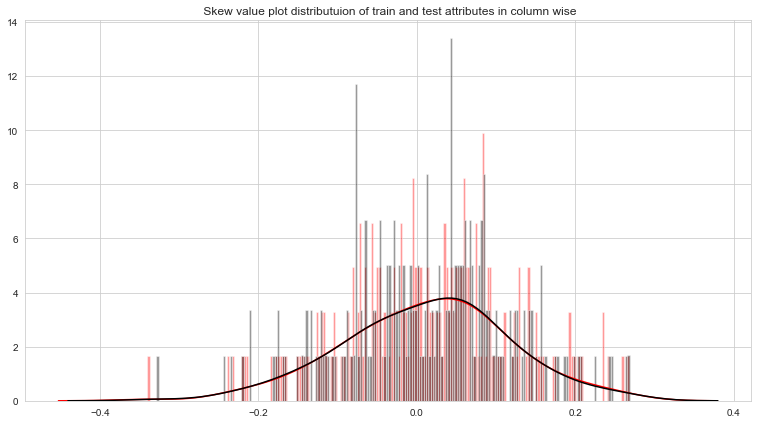

In [31]:
#### skew value plot distributuion of trainset at column wise ####
plt.figure(figsize=(13,7))
sns.distplot(train[train_attributes].skew(axis=0),color='red',kde=True,bins=200,label='train')
#### skew value plot distributuion in testset at column wise ####
sns.distplot(test[test_attributes].skew(axis=0),color='black',kde=True,bins=200,label='test')
plt.title(' Skew value plot distributuion of train and test attributes in column wise')
plt.show

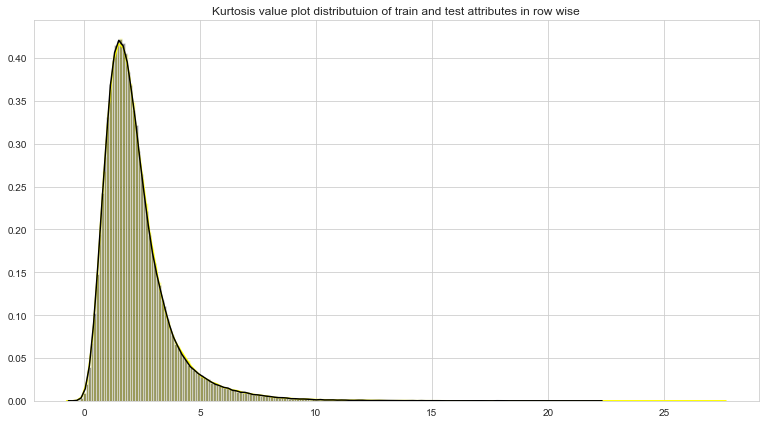

In [32]:
###### Kurtosis value plot distributuion of train and test attributes in dataset ########


#### Kurtosis value plot distributuion of trainset at row wise ####
plt.figure(figsize=(13,7))
sns.distplot(train[train_attributes].kurtosis(axis=1),color='yellow',kde=True,bins=200,label='train')
#### Kurtosis value plot distributuion in testset at row wise ####
sns.distplot(test[test_attributes].kurtosis(axis=1),color='black',kde=True, bins=200,label='test')
plt.title('Kurtosis value plot distributuion of train and test attributes in row wise')
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

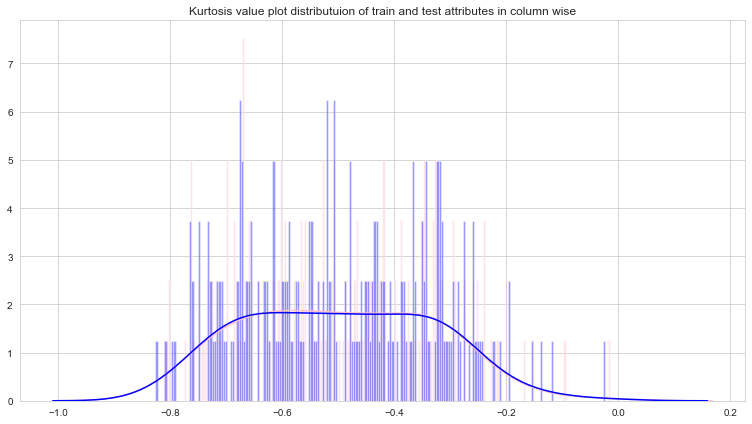

In [33]:
#### kurtosis value plot distributuion of trainset at column wise ####
plt.figure(figsize=(13,7))
sns.distplot(train[train_attributes].kurtosis(axis=0),color='pink',kde=True,bins=200,label='train')
#### kurtosis value plot distributuion in testset at column wise ####
test_attributes=test.columns.values[1:201]
sns.distplot(test[test_attributes].kurtosis(axis=0),color='blue',kde=True,bins=200,label='test')
plt.title('Kurtosis value plot distributuion of train and test attributes in column wise')
plt.show

In [34]:
########### correlation analysis #############

In [35]:
# Compute the correlation matrix
corr = train[numerical_features].corr()
np.fill_diagonal(corr.values,np.nan)
corr.max().max(),corr.min().min()

(0.009713658349534146, -0.009844361358419677)

<function matplotlib.pyplot.show(*args, **kw)>

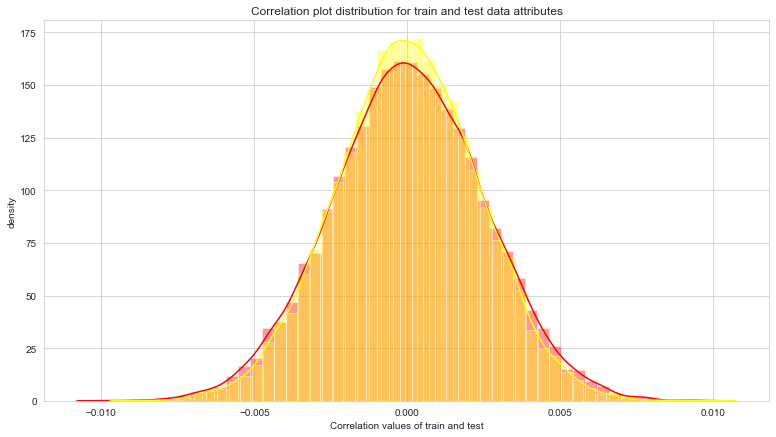

In [36]:
#correlation plot
plt.figure(figsize=(13,7))
#### correlation plot of train set #####
correlations_train=train[train_attributes].corr().abs().unstack().sort_values(kind='quicksort').reset_index()
correlations_train=correlations_train[correlations_train['level_0']!=correlations_train['level_1']]
#print(correlations_train.head(10))
correlations_train=train[train_attributes].corr()
correlations_train=correlations_train.values.flatten()
correlations_train=correlations_train[correlations_train!=1]
sns.distplot(correlations_train, color="Red",label="train")

#### correlation plot of test set #####
correlations_test=test[train_attributes].corr().abs().unstack().sort_values(kind='quicksort').reset_index()
correlations_test=correlations_test[correlations_test['level_0']!=correlations_test['level_1']]
#print(test_correlations.head(10))
correlations_test=test[train_attributes].corr()
correlations_test=correlations_test.values.flatten()
correlations_test=correlations_test[correlations_test!=1]
sns.distplot(correlations_test, color="yellow", label="test")

###labelling##
plt.xlabel("Correlation values of train and test")
plt.ylabel("density")
plt.title("Correlation plot distribution for train and test data attributes")
plt.show 

In [37]:
############################## Training the data #############################  
X=train.drop(columns=['ID_code','target'],axis=1)   
y=train['target']  
test=test.drop(columns=['ID_code'],axis=1)     
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=30)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(150000, 200) (50000, 200) (150000,) (50000,)


In [38]:
################# Feature engineering ######################

#RANDOM FOREST CLASSIFIER
rf_model=RandomForestClassifier(n_estimators=10,random_state=30).fit(X_train,y_train)

In [39]:
################ Permutation importance ##################

#Using eli5 library calculating weights and important features.   
permutation=PermutationImportance(rf_model,random_state=30).fit(X_test,y_test) 
eli5.show_weights(permutation,feature_names=X_test.columns.tolist(),top=200) 

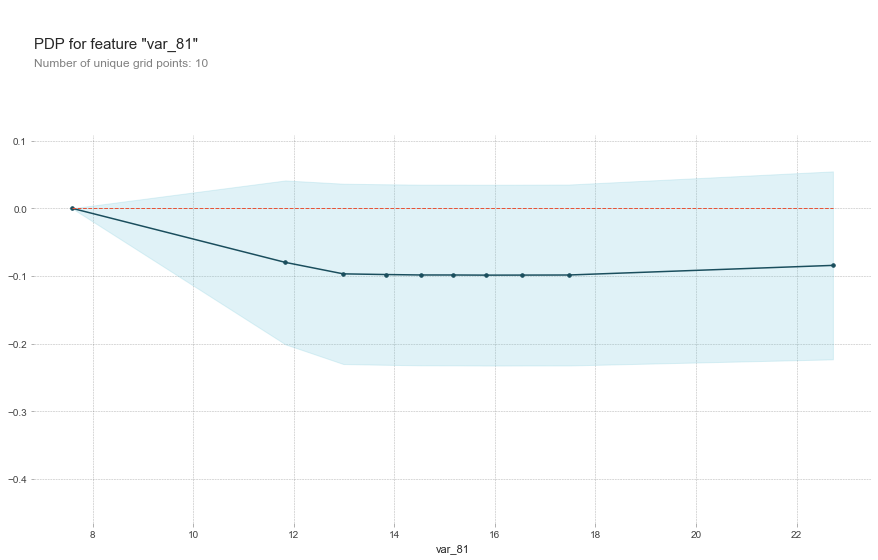

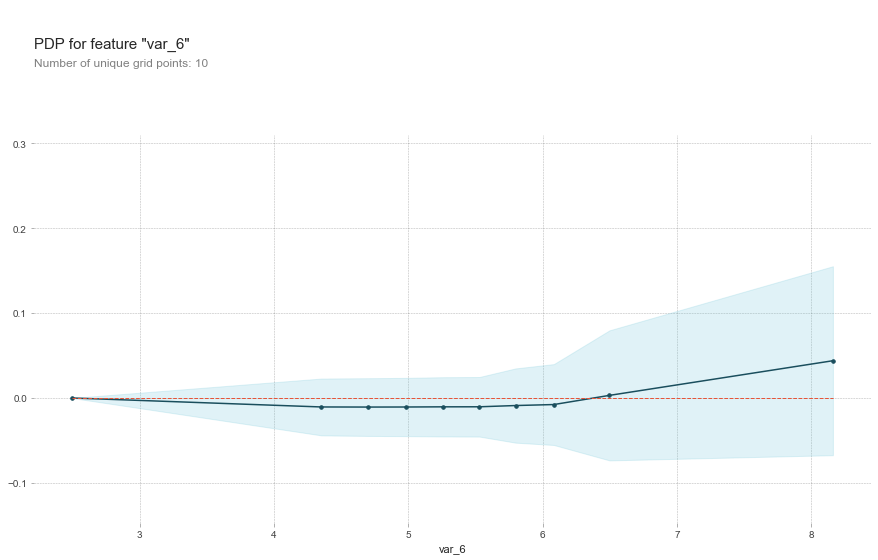

In [40]:
############### Partial dependence plots ################

#Creating pdp plot of 'var_81' 
features=[v for v in X_test.columns if v not in ['ID_code','target']]  
pdp_data=pdp.pdp_isolate(rf_model,dataset=X_test,model_features=features,feature='var_81') 
pdp.pdp_plot(pdp_data,'var_81')  
plt.show() 
 
#Creating pdp plot of 'var_6' 
features=[v for v in X_test.columns if v not in ['ID_code','target']]  
pdp_data=pdp.pdp_isolate(rf_model,dataset=X_test,model_features=features,feature='var_6') 
pdp.pdp_plot(pdp_data,'var_6')  
plt.show() 


In [41]:
############################# Modelling #################################

##### By using StratifiedKFold cross validator training our dataset #####

X=train.drop(['ID_code','target'],axis=1)
Y=train['target'] 
cv=StratifiedKFold(n_splits=5,random_state=30,shuffle=True)  
for train_index,test_index in cv.split(X,Y):     
    X_train,X_test=X.iloc[train_index],X.iloc[test_index] 
    y_train,y_test=Y.iloc[train_index],Y.iloc[test_index] 
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(160001, 200) (39999, 200) (160001,) (39999,)


In [42]:
########################## logistic regression ##########################
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
#logistic regression model
logreg = LogisticRegression().fit(X_train,y_train)

#Accuracy prediction of logistic_model
y_pred = logreg.predict(X_train)
print('logistic regression model accuracy:{:.2f}'.format(logreg.score(X_train,y_train)))

logistic regression model accuracy:0.91


In [43]:
####Cross Validation prediction
cv_prediction=cross_val_predict(logreg,X_test,y_test,cv=3)
####Cross Validation score
cv_score=cross_val_score(logreg,X_test,y_test,cv=3)
print('cross_val_score :',np.average(cv_score))

cross_val_score : 0.9123728521198494


In [44]:
#confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,cv_prediction)
print(confusion_matrix)

[[35429   551]
 [ 2954  1065]]


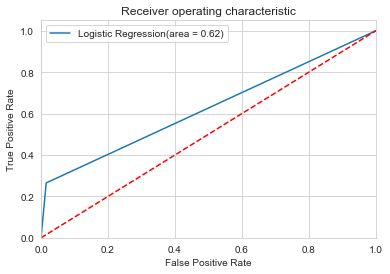

In [45]:
#Roc-Auc curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test,cv_prediction)
fpr,tpr,thresholds = roc_curve(y_test,cv_prediction)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression(area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1],[0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend()
plt.show()

In [46]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,cv_prediction))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     35980
           1       0.66      0.26      0.38      4019

    accuracy                           0.91     39999
   macro avg       0.79      0.62      0.67     39999
weighted avg       0.90      0.91      0.90     39999



In [47]:
#Predicting the model on test data
lr_pred=logreg.predict(test)
print(lr_pred)

[0 0 0 ... 0 0 0]


In [48]:
################################ SMOTE #################################
from imblearn.over_sampling import SMOTE  

#Synthetic Minority Oversampling Technique 
sm = SMOTE(random_state=30)  
#Generating synthetic data points  
X_smote,y_smote=sm.fit_sample(X_train,y_train) 
X_smote_val,y_smote_val=sm.fit_sample(X_test,y_test) 

#Logistic regression model for SMOTE  
smote=LogisticRegression(random_state=30).fit(X_smote,y_smote)   

#Accuracy of Smote model
smote_score=smote.score(X_smote,y_smote) 
print('smote_model accuracy :',smote_score) 

smote_model accuracy : 0.7989188588263086


In [49]:
#Crossvalidation prediction 
cv_pred=cross_val_predict(smote,X_smote_val,y_smote_val,cv=3)  
#Cross validation score  
cv_score=cross_val_score(smote,X_smote_val,y_smote_val,cv=3)  
print('cross_val_score :',np.average(cv_score))

cross_val_score : 0.800764380402121


In [50]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_smote_val,cv_pred)
print(confusion_matrix)

[[28438  7542]
 [ 6795 29185]]


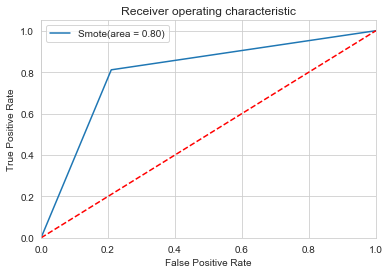

In [51]:
#Roc-Auc curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_smote_val,cv_pred)
fpr,tpr,thresholds = roc_curve(y_smote_val,cv_pred)
plt.figure()
plt.plot(fpr,tpr,label='Smote(area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend()
plt.show()

In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_smote_val,cv_pred))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80     35980
           1       0.79      0.81      0.80     35980

    accuracy                           0.80     71960
   macro avg       0.80      0.80      0.80     71960
weighted avg       0.80      0.80      0.80     71960



In [53]:
#Predicting the model on test data 
smote_pred=smote.predict(test) 
print(smote_pred) 

[1 1 0 ... 0 0 1]


In [54]:
############################# Light gbm #################################

#data for training
lgb_train=lgb.Dataset(X_train,label=y_train)  
#data for validation
lgb_test=lgb.Dataset(X_test,label=y_test) 

#Selecting hyperparameters by tuning the different parameters
params={'boosting_type': 'gbdt','max_depth' : -1,'objective': 'binary','boost_from_average':False,'nthread': 20,'metric':'auc','num_leaves': 50,'learning_rate': 0.01,
'max_bin': 100,'subsample_for_bin': 100,'subsample': 1,'subsample_freq': 1,'colsample_bytree': 0.8,'bagging_fraction':0.5,'bagging_freq':5,'feature_fraction':0.08,
'min_split_gain': 0.45,'min_child_weight': 1,'min_child_samples': 5,'is_unbalance':True,} 

#training lgbm
num_rounds=10000  
lgbm = lgb.train(params,lgb_train,num_rounds,valid_sets=[lgb_train,lgb_test],verbose_eval=1000,early_stopping_rounds = 5000)

Training until validation scores don't improve for 5000 rounds
[1000]	training's auc: 0.938279	valid_1's auc: 0.889497
[2000]	training's auc: 0.95786	valid_1's auc: 0.89375
[3000]	training's auc: 0.97149	valid_1's auc: 0.89572
[4000]	training's auc: 0.981212	valid_1's auc: 0.896195
[5000]	training's auc: 0.987974	valid_1's auc: 0.896452
[6000]	training's auc: 0.992603	valid_1's auc: 0.89646
[7000]	training's auc: 0.995621	valid_1's auc: 0.896206
[8000]	training's auc: 0.997502	valid_1's auc: 0.895803
[9000]	training's auc: 0.998631	valid_1's auc: 0.895401
[10000]	training's auc: 0.999286	valid_1's auc: 0.895108
Did not meet early stopping. Best iteration is:
[10000]	training's auc: 0.999286	valid_1's auc: 0.895108


In [55]:
#predicting the model  
#probability predictions on test data
lgbm_predict_prob=lgbm.predict(test,random_state=30,num_iteration=lgbm.best_iteration) 

#Convert to binary output 1 or 0 
lgbm_predict=np.where(lgbm_predict_prob>=0.5,1,0)  
print(lgbm_predict_prob)  
print(lgbm_predict)

[0.24409282 0.68970833 0.25969172 ... 0.00887777 0.13295105 0.19674373]
[0 1 0 ... 0 0 0]


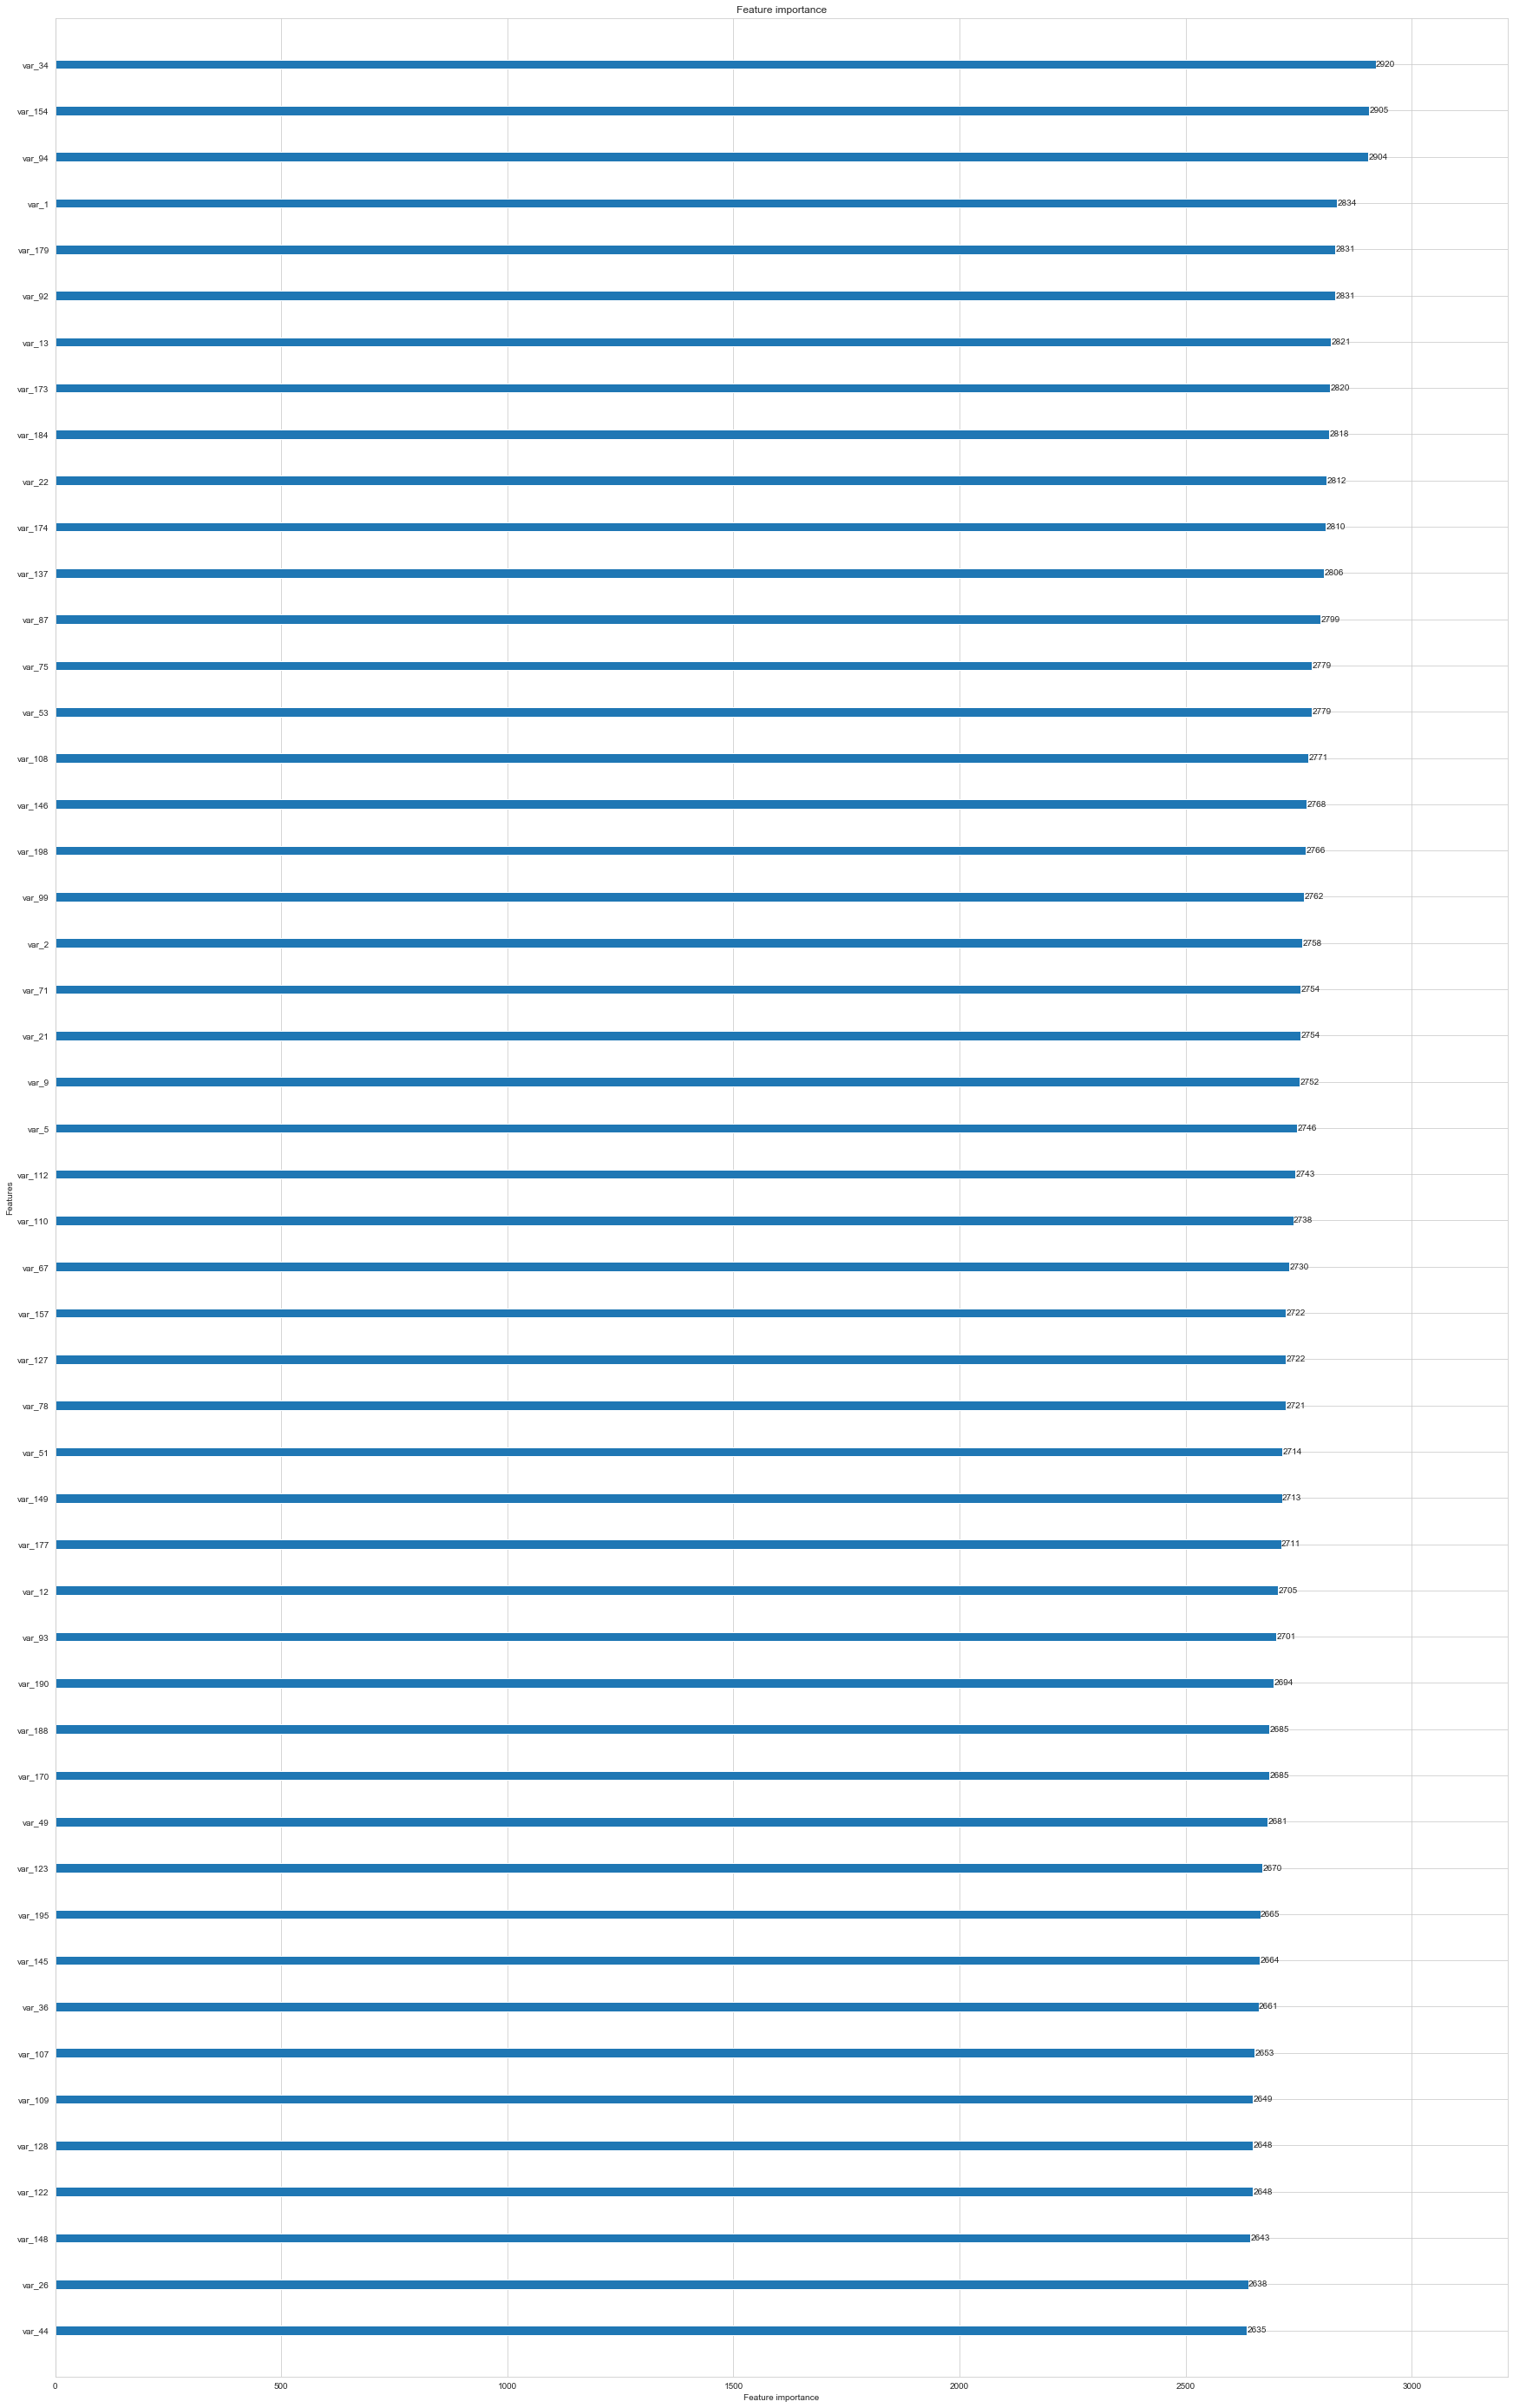

In [56]:
#plot the important features of lgbm
lgb.plot_importance(lgbm,max_num_features=50,importance_type="split",figsize=(30,50)) 

In [57]:
solution = pd.DataFrame({"ID_code":test_id, "target":lgbm_predict})
solution.to_csv("santander.csv", index = False)
solution.head()

ID_code  target
0  test_0       0
1  test_1       1
2  test_2       0
3  test_3       0
4  test_4       0